# Problem Set 7
## MACS 30150
## Songrun He

### Problem 1

In [2]:
# Read in data and have an overview
import pandas as pd

df = pd.read_csv('data/strongdrink.txt')
df.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.describe()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,1.926136,13.006534,2.327159,2.367386,19.492045,99.840909,2.298920,2.043352,0.359545,1.597727,5.031761,0.961000,2.623409,748.477273
std,0.771047,0.814431,1.117747,0.275617,3.355821,14.329499,0.627333,0.995579,0.123046,0.571958,2.317965,0.227225,0.705369,316.208737
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.597500,2.210000,17.175000,88.000000,1.747500,1.242500,0.267500,1.250000,3.200000,0.790000,1.990000,500.000000
50%,2.000000,13.050000,1.845000,2.360000,19.500000,98.000000,2.380000,2.155000,0.340000,1.560000,4.640000,0.975000,2.780000,673.500000
75%,3.000000,13.682500,3.047500,2.560000,21.500000,107.250000,2.800000,2.882500,0.430000,1.952500,6.147500,1.120000,3.172500,986.250000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
df['cultivar'].value_counts()

2    71
1    59
3    46
Name: cultivar, dtype: int64

### (a). a multinomial logistic regression

In [8]:
# Traning and test sets split
from sklearn.model_selection import train_test_split

y = df['cultivar']
X = df[['alco', 'malic', 'tot_phen', 'color_int']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)

In [12]:
from sklearn.linear_model import LogisticRegression
import numpy as np
clf = LogisticRegression(solver = 'newton-cg', multi_class = 'multinomial').fit(X_train, y_train)
pd.DataFrame({'j=1':np.append(clf.intercept_[0], clf.coef_[0]),
              'j=2':np.append(clf.intercept_[1], clf.coef_[1])},
               index = ['beta0', 'beta1', 'beta2', 'beta3', 'beta4'])

,j=1,j=2
beta0,-24.011332,22.801680
beta1,1.700433,-1.467985
beta2,-0.265610,-0.333051
beta3,1.223894,0.664006
beta4,0.022748,-0.922709


In [13]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.87      1.00      0.93        13
           2       1.00      0.90      0.95        21
           3       1.00      1.00      1.00        10

    accuracy                           0.95        44
   macro avg       0.96      0.97      0.96        44
weighted avg       0.96      0.95      0.96        44



The error rate for category 1, 2 and 3 are: 0.13, 0 and 0.

The model predicts category 3 best, because it has highest precision, recall, and f1-score.

In [15]:
print('The number of observations with cultivar =1:',np.sum(df['cultivar']==1))
print('The number of observations with cultivar =2:',np.sum(df['cultivar']==2))
print('The number of observations with cultivar =3:',np.sum(df['cultivar']==3))
print('The number of observations with cultivar =1 in the training set:',sum(y_train==1))
print('The number of observations with cultivar =2 in the training set:',sum(y_train==2))
print('The number of observations with cultivar =3 in the training set:',sum(y_train==3))

The number of observations with cultivar =1: 59
The number of observations with cultivar =2: 71
The number of observations with cultivar =3: 46
The number of observations with cultivar =1 in the training set: 46
The number of observations with cultivar =2 in the training set: 50
The number of observations with cultivar =3 in the training set: 36


Therefore, the most accurately predicted category is not the one with the most observations. Actually, we can see that category 3 has the least number of observations among the three.

In [17]:
MSE = np.sum((y_test != y_pred))/len(y_pred)
print('The MSE from the test set is: ', MSE)

The MSE from the test set is:  0.045454545454545456


### (b) LOOCV

In [18]:
from sklearn.model_selection import LeaveOneOut

Xv = X.values
yv = y.values
N_loo = len(Xv)
loo = LeaveOneOut()
loo.get_n_splits(Xv)
MSE_vec = np.zeros(N_loo)

In [21]:
yp = []
yt = []
for train_index, test_index in loo.split(Xv):
    X_train, X_test = Xv[train_index], Xv[test_index]
    y_train, y_test = yv[train_index], yv[test_index]
    LogReg = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg')
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    yp.append(y_pred)
    yt.append(y_test)
    MSE_vec[test_index] = (y_test != y_pred)**2

In [22]:
print(classification_report(yt, yp))

              precision    recall  f1-score   support

           1       0.90      0.93      0.92        59
           2       0.91      0.90      0.91        71
           3       0.96      0.93      0.95        46

    accuracy                           0.92       176
   macro avg       0.92      0.92      0.92       176
weighted avg       0.92      0.92      0.92       176



The error rate for category 1, 2 and 3 are: 0.10, 0.09 and 0.04.

Same as part (a), category 3 has the smallest error rate. However, the error rate for category 2 and category 3 is larger than that in part (a). The error rate for category 1 is smaller than that in part (a).

In [27]:
MSE_loo = MSE_vec.mean()
print('The LOOCV estimate for the test MSE is: ', MSE_loo)

The LOOCV estimate for the test MSE is:  0.07954545454545454


### (c) K-fold cross validation

In [35]:
from sklearn.model_selection import KFold

k = 4
kf = KFold(n_splits=4, shuffle=True, random_state=10)
kf.get_n_splits(Xv)
MSE_vec_kf = np.zeros(k)
k_ind = int(0)
ypk = []
ytk = []

for train_index, test_index in kf.split(Xv):
    X_train, X_test = Xv[train_index], Xv[test_index]
    y_train, y_test = yv[train_index], yv[test_index]
    LogReg = LogisticRegression(multi_class='multinomial',solver='newton-cg')
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    MSE_vec_kf[k_ind] = ((y_test != y_pred)**2).mean()
    k_ind += 1
    ypk.extend(y_pred)
    ytk.extend(y_test)
print(classification_report(ytk, ypk))

              precision    recall  f1-score   support

           1       0.87      0.93      0.90        59
           2       0.91      0.87      0.89        71
           3       0.96      0.93      0.95        46

    accuracy                           0.91       176
   macro avg       0.91      0.91      0.91       176
weighted avg       0.91      0.91      0.91       176



The error rate for category 1, 2 and 3 are: 0.13, 0.09 and 0.04.

Compared to part (a), error rates for category 2 and 3 increase. Error rate for category 1 remains the same. Compared to part (b), error rate for category 1 increases. Error rates for category 2 and 3 remain the same. 

In [36]:
MSE_kf = MSE_vec_kf.mean()
print('The k-fold estimate for the test MSE is: ', MSE_kf)

The k-fold estimate for the test MSE is:  0.09090909090909091


### Problem 2

In [37]:
df = pd.read_csv('data/CoolIndex.txt', names = ['Age', 'Cool'])
df.head()

,Age,Cool
0,11.0,10.981602
1,11.0,11.364925
2,11.0,10.190227
3,11.0,9.903725
4,11.0,8.997918


In [38]:
df.describe()

,Age,Cool
count,956.000000,956.000000
mean,44.385983,32.790118
std,20.250954,9.246635
min,11.000000,7.942515
25%,27.000000,29.219091
50%,44.000000,33.721898
75%,60.000000,37.453531
max,95.000000,63.649347


### (a) scatter plot

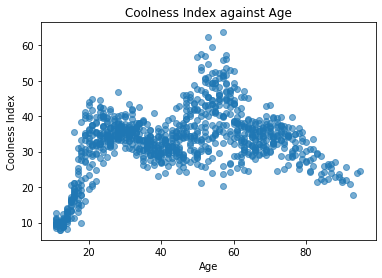

In [43]:
import matplotlib.pyplot as plt

plt.scatter(df.Age, df.Cool, alpha = 0.6)
plt.xlabel('Age')
plt.ylabel('Coolness Index')
plt.title('Coolness Index against Age')
plt.show()

### (b) Stepwise function with OLS

In [44]:
df["G1"]=np.where((df.Age>=11) & (df.Age<22),1,0)
df["G2"]=np.where((df.Age>=22) & (df.Age<40),1,0)
df["G3"]=np.where((df.Age>=40) & (df.Age<59),1,0)
df["G4"]=np.where((df.Age>=59) & (df.Age<77),1,0)
df["G5"]=np.where((df.Age>=77) & (df.Age<=95),1,0)

In [47]:
import statsmodels.api as sm

X=df[["G1","G2","G3","G4","G5"]]
res=sm.OLS(df.Cool,X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   Cool   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     178.7
Date:                Mon, 24 Feb 2020   Prob (F-statistic):          3.73e-114
Time:                        16:34:32   Log-Likelihood:                -3214.5
No. Observations:                 956   AIC:                             6439.
Df Residuals:                     951   BIC:                             6463.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
G1            20.1025      0.562     35.746      0.0

The estimated beta1, beta2, beta3, beta4 and beta5 are: 20.1025, 34.4758, 37.6351, 35.2254 and 27.2964.

In [48]:
res.predict([0,0,0,1,0])

array([35.22540004])

The predicted level of coolness for a 73-year old from the stepwise function is 35.2254.

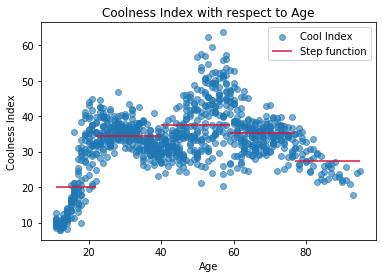

In [51]:
values = [20.1025, 34.4758, 37.6351, 35.2254, 27.2964]
plt.scatter(df['Age'],df['Cool'], alpha=0.6,label='Cool Index')
x_min = np.array([11, 22, 40, 59, 77])
x_max = np.array([22, 40, 59, 77, 95])
plt.hlines(values, x_min, x_max, color='crimson', label='Step function')
plt.xlabel("Age")
plt.ylabel("Coolness Index")
plt.title("Coolness Index with respect to Age")
plt.legend()
plt.show()

### (c) linear spline

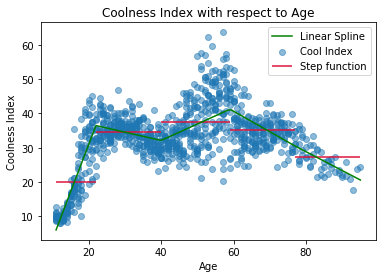

In [54]:
from scipy.interpolate import LSQUnivariateSpline
t = np.array([22,40,59,77])
df.sort_index(0, ascending=True, inplace=True)
group = df.groupby('Age', as_index = False).mean()
usl = LSQUnivariateSpline(group.Age.values, group.Cool.values, t, k=1)
age2 = np.linspace(11,95,100)

plt.scatter(df['Age'],df['Cool'], alpha=0.5,label='Cool Index')
plt.hlines(values, x_min, x_max, color='crimson', label='Step function')
plt.plot(age2, usl(age2), color='green', label='Linear Spline')
plt.xlabel("Age")
plt.ylabel("Coolness Index")
plt.title("Coolness Index with respect to Age")
plt.legend()
plt.show()

In [56]:
print('The predicted coolness index of a 73-year-old person from the linear spline is', usl(73))

The predicted coolness index of a 73-year-old person from the linear spline is 32.86784862349653


### (d) cubic spline

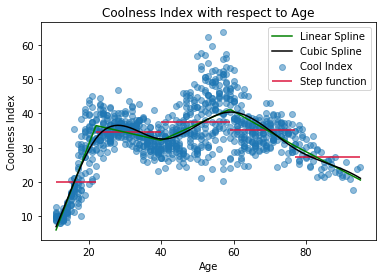

In [57]:
usl2 = LSQUnivariateSpline(group.Age.values, group.Cool.values, t, k=3)

plt.scatter(df['Age'],df['Cool'], alpha=0.5,label='Cool Index')
plt.hlines(values, x_min, x_max, color='crimson', label='Step function')
plt.plot(age2, usl(age2), color='green', label='Linear Spline')
plt.plot(age2, usl2(age2), 'k-', label='Cubic Spline')
plt.xlabel("Age")
plt.ylabel("Coolness Index")
plt.title("Coolness Index with respect to Age")
plt.legend()
plt.show()

In [58]:
print('The predicted coolness index of a 73-year-old person from the linear spline is', usl2(73))

The predicted coolness index of a 73-year-old person from the linear spline is 32.642301066279764
